In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [10]:
# Load the IMDB dataset
max_features = 10000
maxlen = 500
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [11]:
# Pad sequences to make them of equal length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
print('Training...')
history = model.fit(input_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Training...
Epoch 1/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.7868 - val_accuracy: 0.8618
Epoch 2/20
625/625 [==============================] - 25s 41ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.7763 - val_accuracy: 0.8526
Epoch 3/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0290 - accuracy: 0.9916 - val_loss: 0.7531 - val_accuracy: 0.8454
Epoch 4/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.8069 - val_accuracy: 0.8456
Epoch 5/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.8099 - val_accuracy: 0.8422
Epoch 6/20
625/625 [==============================] - 26s 41ms/step - loss: 0.0199 - accuracy: 0.9947 - val_loss: 0.7897 - val_accuracy: 0.8444
Epoch 7/20
625/625 [==============================] - 26s 42ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.8751 - v

In [31]:
# Evaluate the model
score, acc = model.evaluate(input_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 12s 15ms/step - loss: 1.2959 - accuracy: 0.8434
Test score: 1.2958711385726929
Test accuracy: 0.8433600068092346


In [34]:
# Count positive and negative reviews in the training set
positive_reviews = np.sum(y_train)
negative_reviews = len(y_train) - positive_reviews
print(f'Number of Positive Reviews in Training Set: {positive_reviews}')
print(f'Number of Negative Reviews in Training Set: {negative_reviews}')

Number of Positive Reviews in Training Set: 12500
Number of Negative Reviews in Training Set: 12500


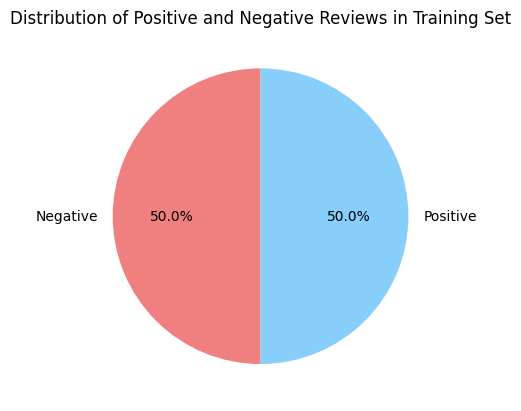

In [35]:
# Visualize the distribution of positive and negative reviews
labels = ['Negative', 'Positive']
sizes = [negative_reviews, positive_reviews]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Positive and Negative Reviews in Training Set')
plt.show()


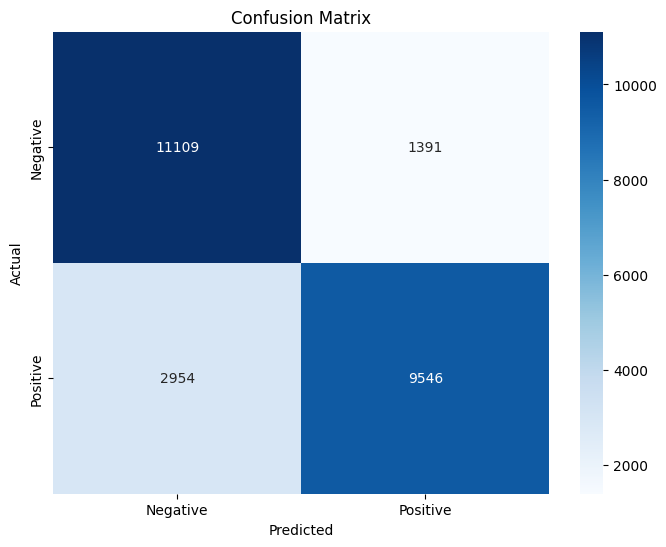

In [36]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


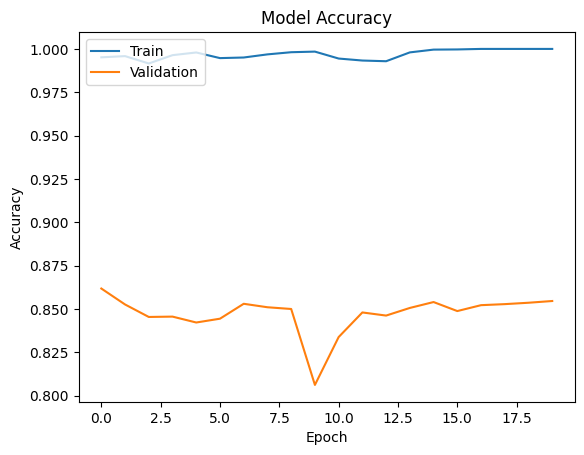

In [37]:
# Visualize training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [38]:
# Make predictions on the test set
y_pred = (model.predict(input_test) > 0.5).astype("int32")

782/782 [==============================] - 11s 15ms/step


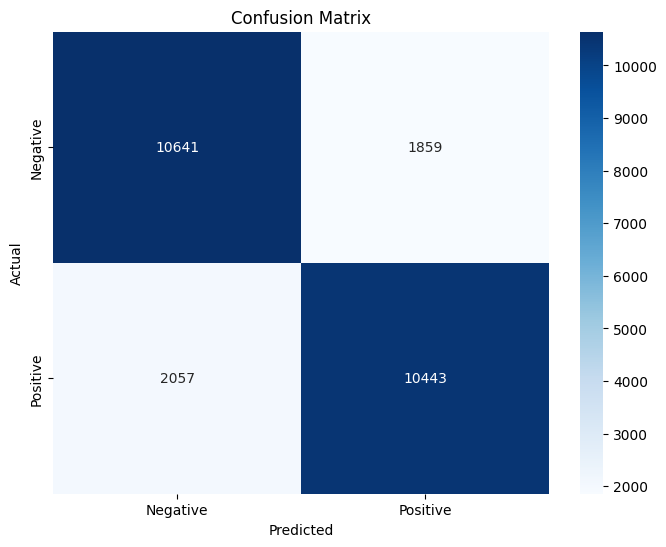

In [39]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Make predictions on the training set
y_train_pred = (model.predict(input_train) > 0.5).astype("int32")

# Count positive and negative predictions on the training set
positive_train_predictions = np.sum(y_train_pred)
negative_train_predictions = len(y_train_pred) - positive_train_predictions
print(f'Number of Positive Predictions on Training Set: {positive_train_predictions}')
print(f'Number of Negative Predictions on Training Set: {negative_train_predictions}')


782/782 [==============================] - 12s 15ms/step
Number of Positive Predictions on Training Set: 12499
Number of Negative Predictions on Training Set: 12501
